In [1]:
# Load library
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Section 2: Preliminary exploratory data analysis


#### ～Reading Data into R

In [2]:
names = c("integrated_mean", "integrated_standard_deviation", "integrated_kurtosis", "integrated_skewness", "curve_mean", "curve_standard_deviation", "curve_kurtosis", "curve_skewness", "class")
pulsar_train <- read_csv("pulsar_data_train.csv")
head(pulsar_train)
pulsar_test <- read_csv("pulsar_data_test.csv")
head(pulsar_test)


Parsed with column specification:
cols(
  `Mean of the integrated profile` = col_double(),
  `Standard deviation of the integrated profile` = col_double(),
  `Excess kurtosis of the integrated profile` = col_double(),
  `Skewness of the integrated profile` = col_double(),
  `Mean of the DM-SNR curve` = col_double(),
  `Standard deviation of the DM-SNR curve` = col_double(),
  `Excess kurtosis of the DM-SNR curve` = col_double(),
  `Skewness of the DM-SNR curve` = col_double(),
  target_class = col_double()
)



Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
121.15625,48.37297,0.3754847,-0.01316549,3.168896,18.39937,7.449874,65.159298,0
76.96875,36.17556,0.7128979,3.38871856,2.399666,17.57100,9.414652,102.722975,0
130.58594,53.22953,0.1334083,-0.29724164,2.743311,22.36255,8.508364,74.031324,0
156.39844,48.86594,-0.2159886,-0.17129365,17.471572,NA,2.958066,7.197842,0
84.80469,36.11766,0.8250128,3.27412537,2.790134,20.61801,8.405008,76.291128,0
121.00781,47.17694,0.2297081,0.09133623,2.036789,NA,9.546051,112.131721,0


Parsed with column specification:
cols(
  `Mean of the integrated profile` = col_double(),
  `Standard deviation of the integrated profile` = col_double(),
  `Excess kurtosis of the integrated profile` = col_double(),
  `Skewness of the integrated profile` = col_double(),
  `Mean of the DM-SNR curve` = col_double(),
  `Standard deviation of the DM-SNR curve` = col_double(),
  `Excess kurtosis of the DM-SNR curve` = col_double(),
  `Skewness of the DM-SNR curve` = col_double(),
  target_class = col_logical()
)



Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
116.90625,48.92060,0.1860463,-0.1298151,3.037625,17.73710,8.1226208,78.813405,NA
75.58594,34.38625,2.0254984,8.6529130,3.765050,21.89705,7.0481886,55.878791,NA
103.27344,46.99663,0.5042952,0.8210883,2.244983,15.62257,9.3304985,105.134942,NA
101.07812,48.58749,1.0114270,1.1518699,81.887960,81.46414,0.4851051,-1.117904,NA
113.22656,48.60880,0.2915380,0.2921203,6.291806,26.58506,4.5401376,21.708268,NA
85.47656,38.05279,NA,1.9150973,2.637124,NA,9.0015001,NA,NA


#### ～Tidy Format

By looking at the data itself, it is already a tidy format since each row represents one observation, each column is a single variable and each value is in a single cell. But to make the data more concise and readable, we choose to rename the column names to make it stay in a single line. Also, we change the category of target_class to factor since it can only be 0 or 1.

In [3]:
pulsar_train_tidy <- rename(pulsar_train, integrated_profile_mean = `Mean of the integrated profile`,
                                integrated_profile_standard_deviation = `Standard deviation of the integrated profile`,
                                 integrated_profile_kurtosis = `Excess kurtosis of the integrated profile`,
                                 integrated_profile_skewness = `Skewness of the integrated profile`,
                                 DMSNR_curve_mean = `Mean of the DM-SNR curve`,
                                 DMSNR_curve_standard_deviation = `Standard deviation of the DM-SNR curve`,
                                 DMSNR_curve_kurtosis = `Excess kurtosis of the DM-SNR curve`,
                                 DMSNR_curve_skewness = `Skewness of the DM-SNR curve`) %>%
                     mutate(target_class = as_factor(target_class))
pulsar_test_tidy <- rename(pulsar_test, integrated_profile_mean = `Mean of the integrated profile`,
                                integrated_profile_standard_deviation = `Standard deviation of the integrated profile`,
                                 integrated_profile_kurtosis = `Excess kurtosis of the integrated profile`,
                                 integrated_profile_skewness = `Skewness of the integrated profile`,
                                 DMSNR_curve_mean = `Mean of the DM-SNR curve`,
                                 DMSNR_curve_standard_deviation = `Standard deviation of the DM-SNR curve`,
                                 DMSNR_curve_kurtosis = `Excess kurtosis of the DM-SNR curve`,
                                 DMSNR_curve_skewness = `Skewness of the DM-SNR curve`) %>%
                      mutate(target_class = as_factor(target_class))


head(pulsar_train_tidy)  
head(pulsar_test_tidy)

integrated_profile_mean,integrated_profile_standard_deviation,integrated_profile_kurtosis,integrated_profile_skewness,DMSNR_curve_mean,DMSNR_curve_standard_deviation,DMSNR_curve_kurtosis,DMSNR_curve_skewness,target_class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
121.15625,48.37297,0.3754847,-0.01316549,3.168896,18.39937,7.449874,65.159298,0
76.96875,36.17556,0.7128979,3.38871856,2.399666,17.57100,9.414652,102.722975,0
130.58594,53.22953,0.1334083,-0.29724164,2.743311,22.36255,8.508364,74.031324,0
156.39844,48.86594,-0.2159886,-0.17129365,17.471572,NA,2.958066,7.197842,0
84.80469,36.11766,0.8250128,3.27412537,2.790134,20.61801,8.405008,76.291128,0
121.00781,47.17694,0.2297081,0.09133623,2.036789,NA,9.546051,112.131721,0


integrated_profile_mean,integrated_profile_standard_deviation,integrated_profile_kurtosis,integrated_profile_skewness,DMSNR_curve_mean,DMSNR_curve_standard_deviation,DMSNR_curve_kurtosis,DMSNR_curve_skewness,target_class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
116.90625,48.92060,0.1860463,-0.1298151,3.037625,17.73710,8.1226208,78.813405,NA
75.58594,34.38625,2.0254984,8.6529130,3.765050,21.89705,7.0481886,55.878791,NA
103.27344,46.99663,0.5042952,0.8210883,2.244983,15.62257,9.3304985,105.134942,NA
101.07812,48.58749,1.0114270,1.1518699,81.887960,81.46414,0.4851051,-1.117904,NA
113.22656,48.60880,0.2915380,0.2921203,6.291806,26.58506,4.5401376,21.708268,NA
85.47656,38.05279,NA,1.9150973,2.637124,NA,9.0015001,NA,NA


#### ～Summarize the data 

For summary section, we choose to make two tables, one used to summarize the information we could get from all the predictors and the other for summarizing the given target_class in training set.

* Table 1

In [4]:
# Gather necessary summary in this cell
Col1 <- pulsar_train_tidy$integrated_profile_mean
Col2 <- pulsar_train_tidy$integrated_profile_standard_deviation
Col3 <- pulsar_train_tidy$integrated_profile_kurtosis
Col4 <- pulsar_train_tidy$integrated_profile_skewness
Col5 <- pulsar_train_tidy$DMSNR_curve_mean
Col6 <- pulsar_train_tidy$DMSNR_curve_standard_deviation
Col7 <- pulsar_train_tidy$DMSNR_curve_kurtosis
Col8 <- pulsar_train_tidy$DMSNR_curve_skewness

summary_column1 <- summary(Col1, na.rm = TRUE)
summary_column2 <- summary(Col2, na.rm = TRUE)
summary_column3 <- summary(Col3, na.rm = TRUE)
summary_column4 <- summary(Col4, na.rm = TRUE)
summary_column5 <- summary(Col5, na.rm = TRUE)
summary_column6 <- summary(Col6, na.rm = TRUE)
summary_column7 <- summary(Col7, na.rm = TRUE)
summary_column8 <- summary(Col8, na.rm = TRUE)

na_C1 <- sum(is.na(Col1))
na_C2 <- sum(is.na(Col2))
na_C3 <- sum(is.na(Col3))
na_C4 <- sum(is.na(Col4))
na_C5 <- sum(is.na(Col5))
na_C6 <- sum(is.na(Col6))
na_C7 <- sum(is.na(Col7))
na_C8 <- sum(is.na(Col8))

n_observation <- nrow(pulsar_train_tidy) 

In [5]:
# Create summary table for predictor here

#create a data.frame for summary information
row_part1 <- data.frame(rbind(summary_column1,summary_column2, summary_column4, summary_column5 ,summary_column7))
row_part2 <- select(data.frame(rbind(summary_column3,summary_column6,summary_column8)), -NA.s)
predictors_summary <- rbind(row_part1, row_part2)

predictors_table <- setNames(cbind(rownames(predictors_summary), predictors_summary, row.names = NULL), 
         c("data_type", "Minimun", "Q1(25% percentile)",
           "Median", "Mean", "Q3(75% percentile)", "Maximun")) %>% #Add name to first column
         mutate(n = c(1,2,4,5,7,3,6,8)) %>%
         arrange(n) %>%
         mutate(data_type = c("integrated_profile_mean","integrated_profile_standard_deviation","integrated_profile_kurtosis",
                              "integrated_profile_skewness","DMSNR_curve_mean","DMSNR_curve_standard_deviation",
                              "DMSNR_curve_kurtosis","DMSNR_curve_skewness")) %>%
         mutate(number_of_NA = c(na_C1,na_C2,na_C3,na_C4,na_C5,na_C6,na_C7,na_C8)) %>%  #add NA information
         mutate(number_of_data = c(n_observation)) %>% #add number of observations
         select(-n) #remove useless column
predictors_table

data_type,Minimun,Q1(25% percentile),Median,Mean,Q3(75% percentile),Maximun,number_of_NA,number_of_data
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
integrated_profile_mean,5.8125000,100.87109375,115.183594,111.0418413,127.1093750,189.734375,0,12528
integrated_profile_standard_deviation,24.7720418,42.36222228,46.931022,46.5214373,50.9791025,91.808628,0,12528
integrated_profile_kurtosis,-1.7380208,0.02465239,0.223678,0.4785477,0.4731246,8.069522,1735,12528
integrated_profile_skewness,-1.7918860,-0.18814176,0.203317,1.7784311,0.9323738,68.101622,0,12528
DMSNR_curve_mean,0.2132107,1.91053512,2.792642,12.6747578,5.4132525,222.421405,0,12528
DMSNR_curve_standard_deviation,7.3704322,14.40435324,18.412402,26.3513182,28.3374185,110.642211,1178,12528
DMSNR_curve_kurtosis,-3.1392696,5.80306338,8.451097,8.3334891,10.7279272,34.539844,0,12528
DMSNR_curve_skewness,-1.9769756,35.19989860,83.126301,105.5257790,139.9978498,1191.000837,625,12528


As we have quantatative data to determine whether it is pulsar, we choose to use the 5 number summary, which dipicts the data. Also, we include the number of NAs in each cell and total observations we have, which provides a clear overview of the data.

* Table 2

In [6]:
#Get table for information about Target class
class_table <- group_by(pulsar_train_tidy, target_class) %>%
               summarize(count=n())
name <- c("non-pulsar", "pulsar")
class_table$type <- name
class_table

`summarise()` ungrouping output (override with `.groups` argument)



target_class,count,type
<fct>,<int>,<chr>
0,11375,non-pulsar
1,1153,pulsar


From this table, we can see that in training set, the number of non_pulsar is much more than the pulsar, which reminds us that we needs to also set the same proprotion as here when doing cross_validation later in data analysis.

#### ~Visualize the data

* Plot 1

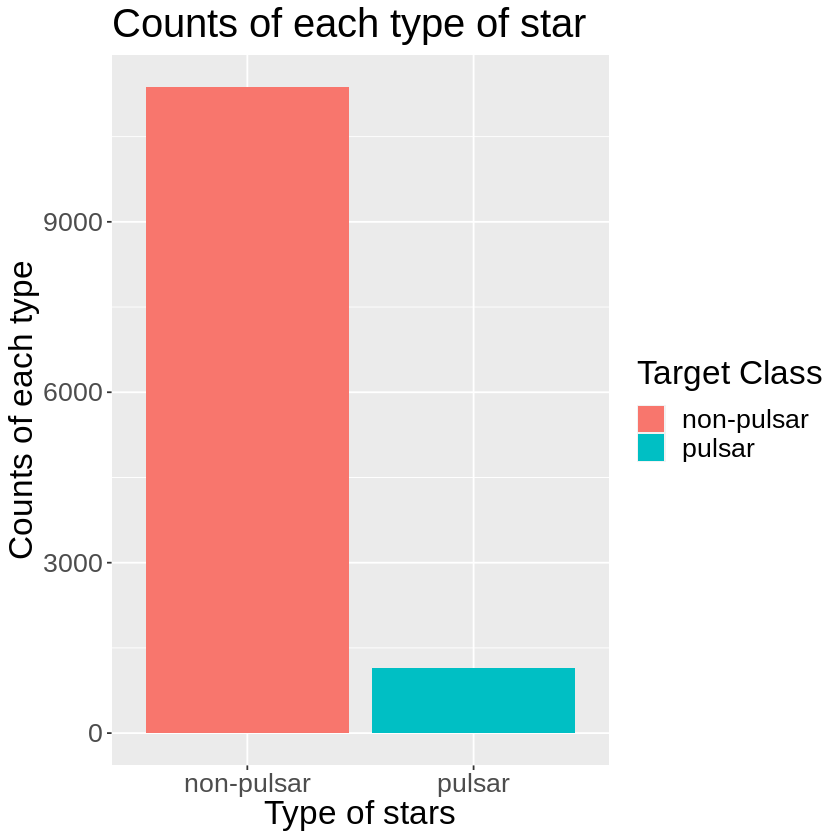

In [7]:
#Visualize our data (counts of each type of star)
Class_counts_chart <- ggplot(class_table, aes(x = type, y = count, fill = type))+
geom_bar(stat = "identity")+
ggtitle("Counts of each type of star")+
labs(x = "Type of stars", y = "Counts of each type", fill = "Target Class")+
theme(text = element_text(size = 20))
Class_counts_chart

The chart above visualizes the table above, about the number of pulsar and non-pulsar star, which clearly reveals that there is much more pulsar stars in this data set.

* Plot 2

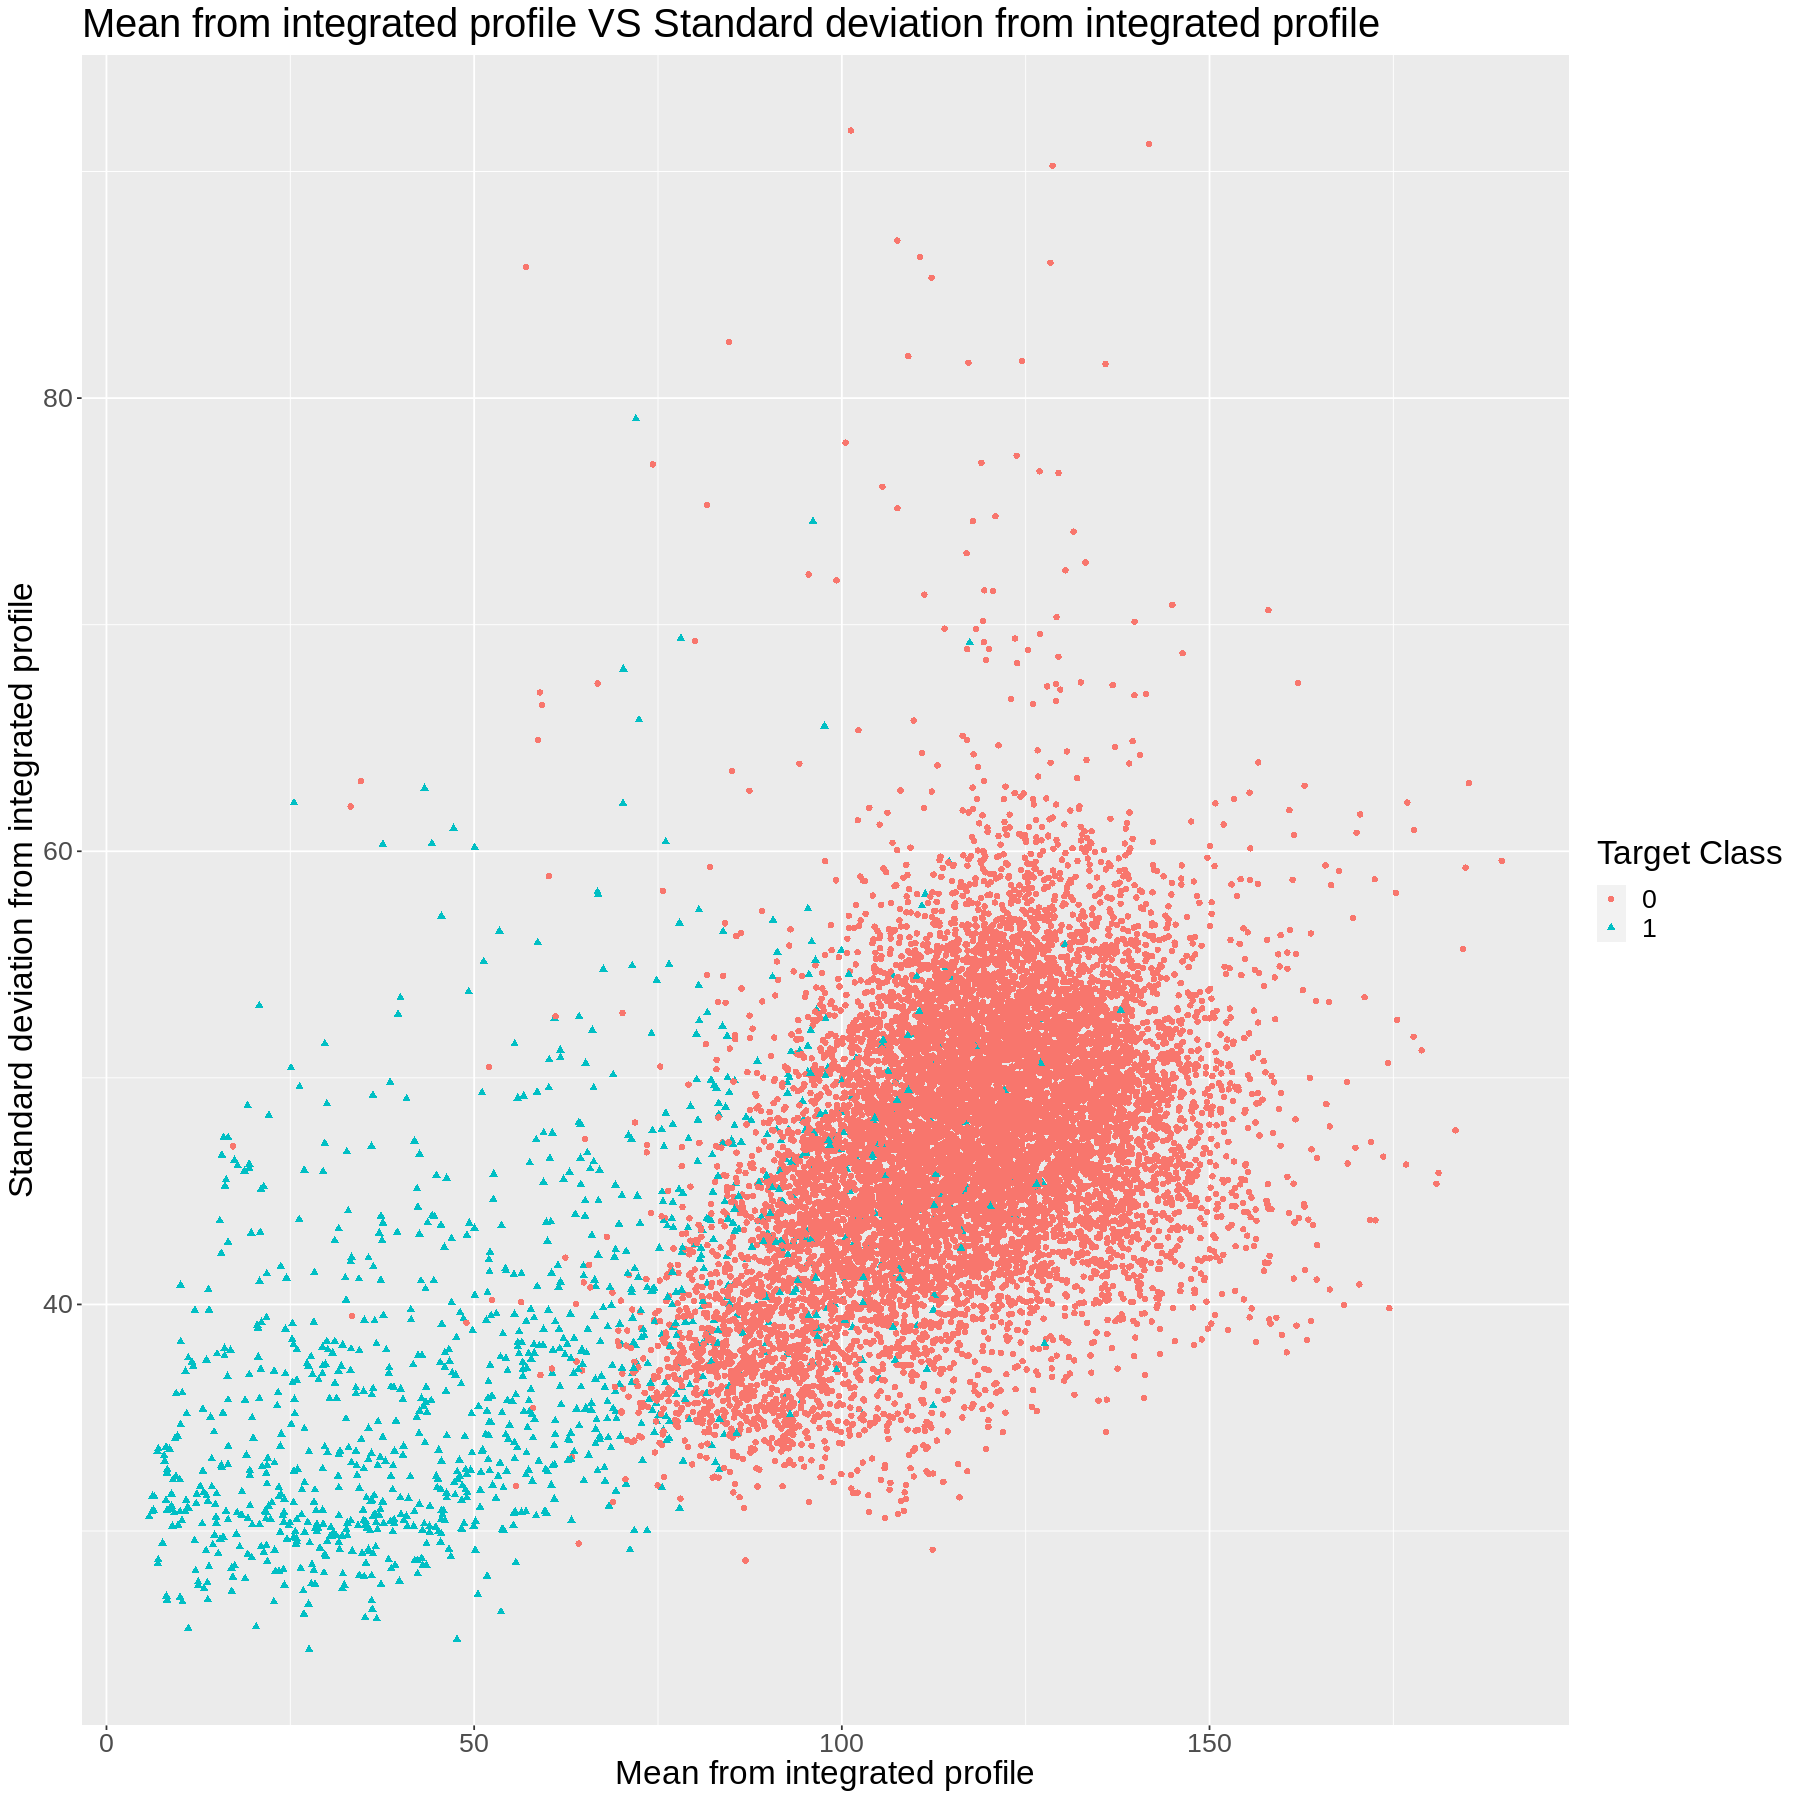

In [8]:
#Visualize our data (scatterplot of the two class of star from their integrated profile)
options(repr.plot.width = 15, repr.plot.height = 15)
Integrated_profile_plot <- ggplot(pulsar_train_tidy, 
            aes(x = integrated_profile_mean, y = integrated_profile_standard_deviation, colour = target_class, shape = target_class))+
geom_point()+
ggtitle("Mean from integrated profile VS Standard deviation from integrated profile")+
labs(x = "Mean from integrated profile", y = "Standard deviation from integrated profile", colour = "Target Class", shape = "Target Class")+
theme(text = element_text(size = 20))
         Integrated_profile_plot                       

The scatterplot demonstrates the distribution of the two types of star, which we can see that non-pulsar stars have higher mean values than pulsar stars from integrated profile.

* Plot 3

Warning message:
“Removed 1178 rows containing missing values (geom_point).”


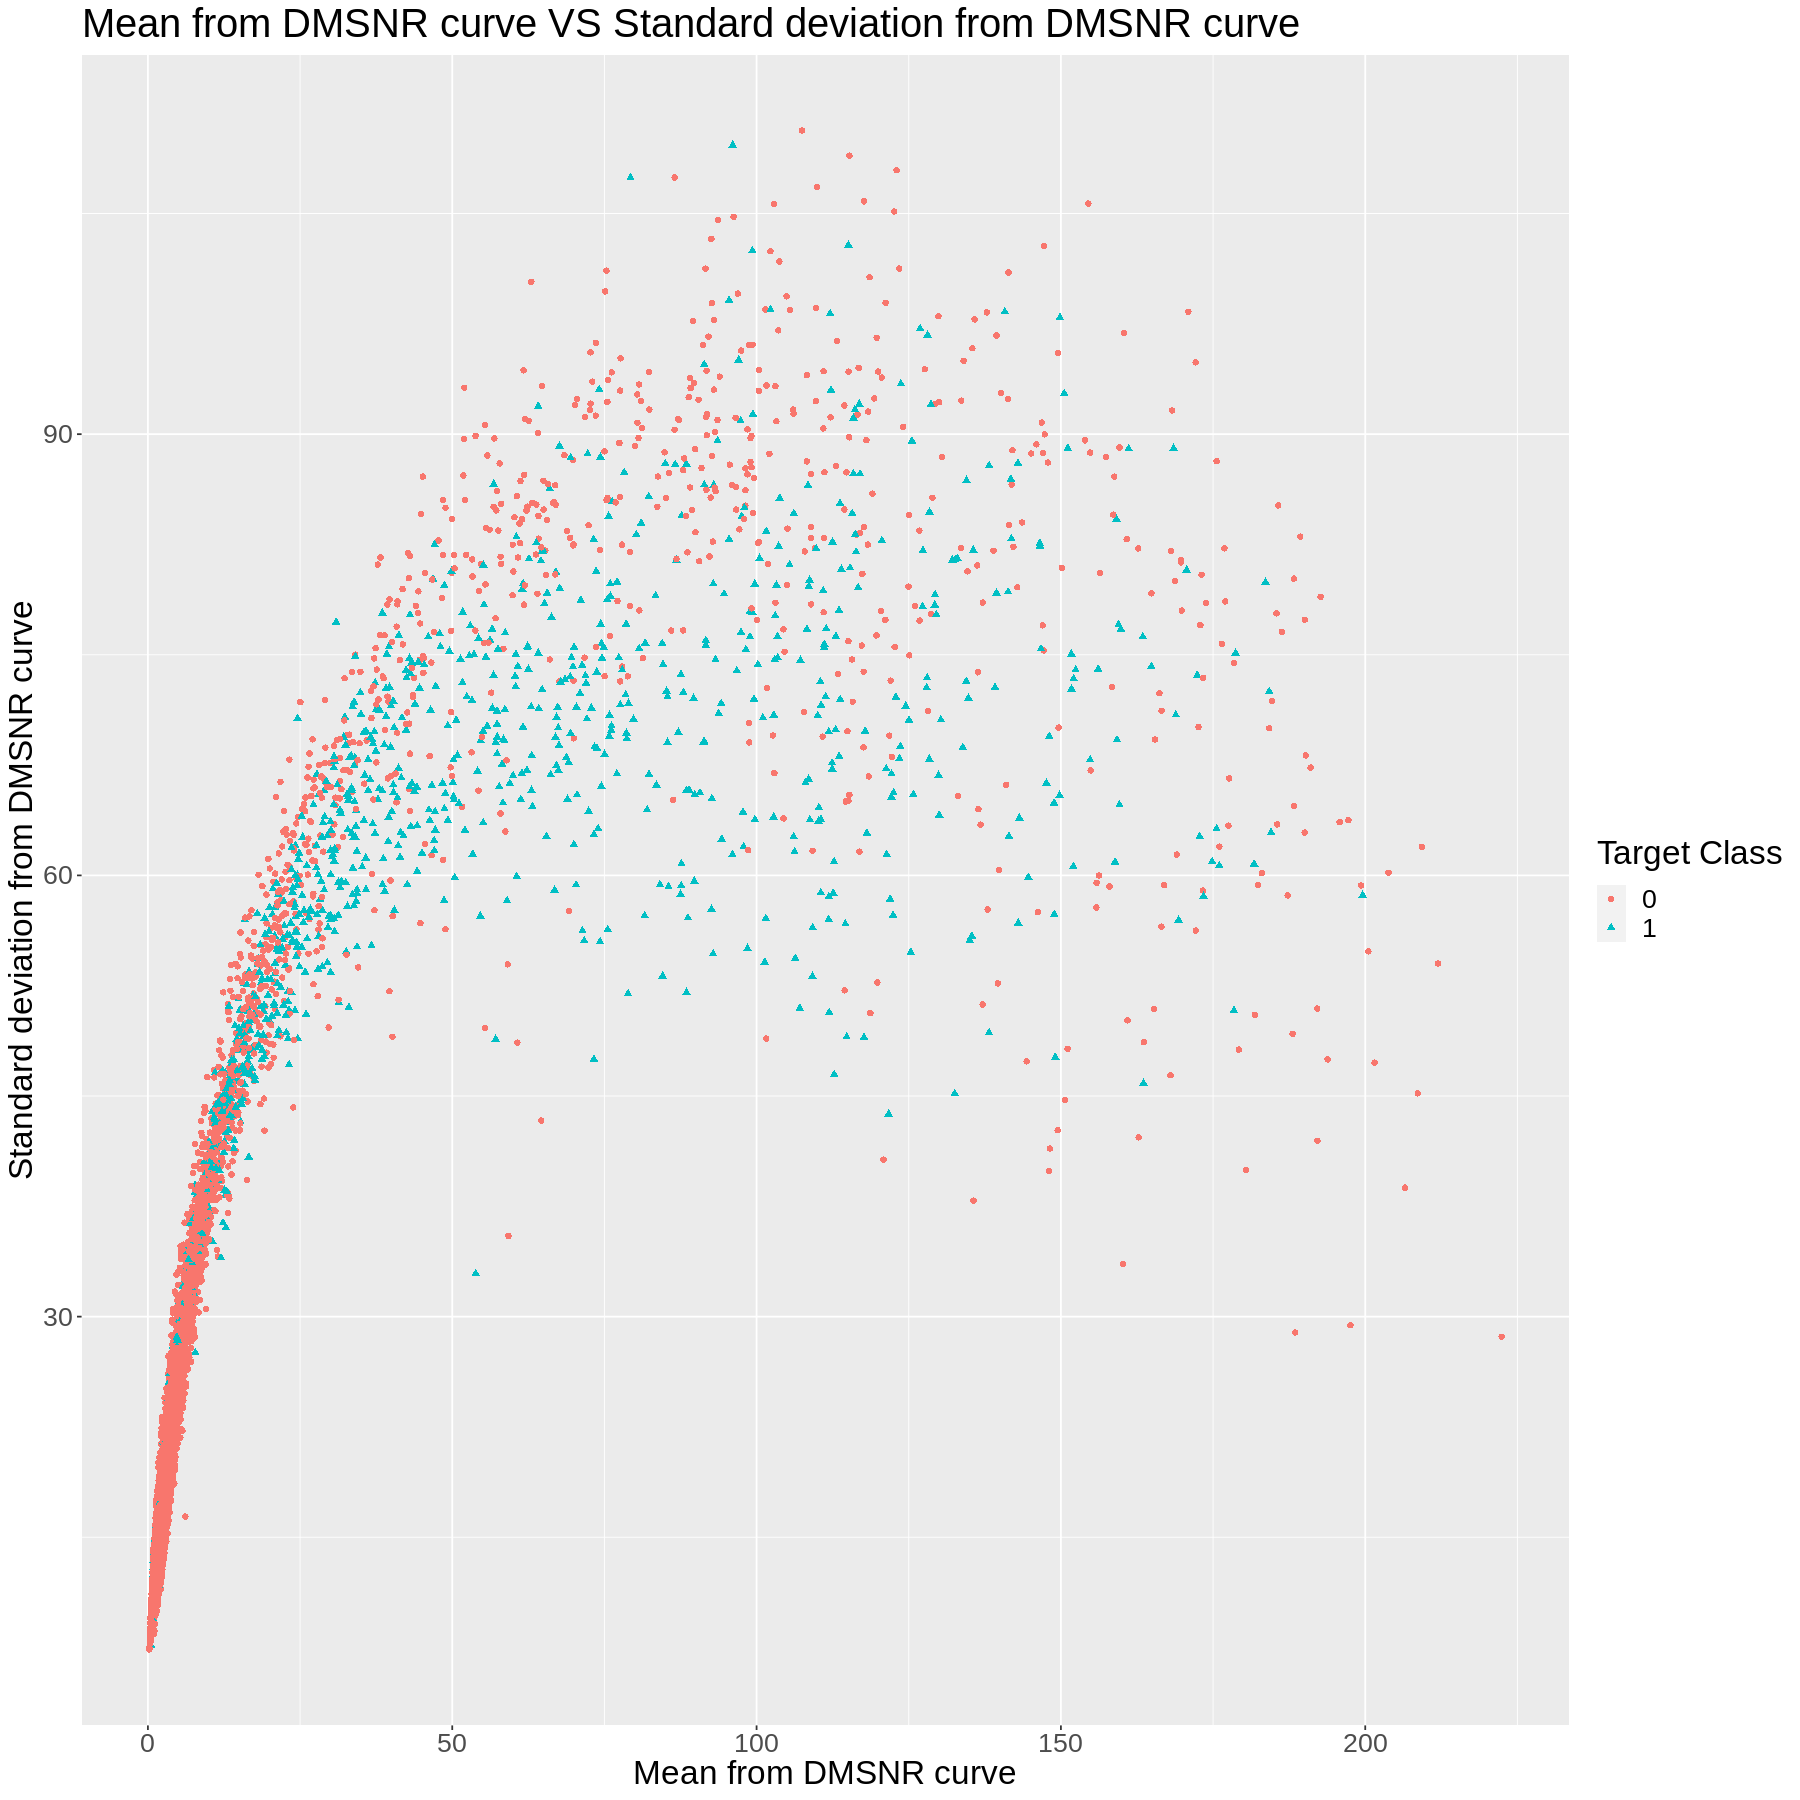

In [9]:
#Visualize our data (scatterplot of the two class of star from their DMSNR curve data)
options(repr.plot.width = 15, repr.plot.height = 15)
DMSNR_plot <- ggplot(pulsar_train_tidy, 
            aes(x = DMSNR_curve_mean, y = DMSNR_curve_standard_deviation, colour = target_class, shape = target_class))+
geom_point()+
ggtitle("Mean from DMSNR curve VS Standard deviation from DMSNR curve")+
labs(x = "Mean from DMSNR curve", y = "Standard deviation from DMSNR curve", colour = "Target Class", shape = "Target Class")+
theme(text = element_text(size = 20))
         DMSNR_plot              

The scatterplot above shows the distribution of the two types of stars and it also shows a very special pattern: most of the non-pulsar stars have mean value from DMSNR curve close to 0. So concluding from these two scatterplots, pulsar stars in general have a higher mean value tha non-pulsar stars, which could be a crucial factor for us to predict the type of a given star.